# 영화 리뷰 분류: 이진 분류

---
* 50,000개 데이터셋 (훈련 데이터 25,000 / 테스트 데이터 25,000)
* 50% 부정 / 50% 긍정
* 용량 17MB + 전처리 완료 데이터

In [2]:
import tensorflow.keras
import pandas as pd

from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

2023-12-20 10:04:53.250804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(type(train_data))

<class 'numpy.ndarray'>


In [4]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [5]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
len(train_data[0])      # 첫번째 리뷰의 크기 (분석한 단어 수)

218

# 데이터 전처리

## 데이터프레임으로 변경

In [7]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns=['train_data']
movie_df['test_data'] = train_labels_df
movie_df        # test_data 1은 긍정, 0은 부정

,train_data,test_data
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [8]:
movie_df.shape

(25000, 2)

In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   train_data  25000 non-null  object
 1   test_data   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
movie_df.dtypes

train_data    object
test_data      int64
dtype: object

In [11]:
movie_df.isnull().sum()

train_data    0
test_data     0
dtype: int64

In [12]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [13]:
movie_df.loc[:]['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [14]:
# # train_data에 들어있는 리뷰 각각이 갖고 있는 인코딩인덱스 중 최댓값
# [max(sequence) for sequence in train_data]
# # train_data에 들어있는 리뷰 각각이 갖고 있는 인코딩인덱스 중 최댓값의 최댓값 => 9999, 즉 num_words=10000으로 설정해서 10000을 넘지 못함
max([max(sequence) for sequence in train_data])

9999

## 인코딩 - 디코딩 확인

* 인코딩된 방식(단어와 넘버로 이루어진 딕셔너리) 확인

In [15]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

* 디코딩을 위해 인코딩 딕셔너리 키-밸류 순서 바꾸기

In [16]:
# 방법 1
reversed_word_index = {}
for key, value in word_index.items():
    reversed_word_index[value] = key

# 방법 2    
reversed_word_index2 = dict((value,key) for (key,value) in word_index.items())

In [17]:
print(len(reversed_word_index2))

88584


In [18]:
sorted(reversed_word_index.items())

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [19]:
print(sorted(reversed_word_index.items())[9998])
print(reversed_word_index[9999])

(9999, 'beaver')
beaver


* 인코딩 기준이 된 딕셔너리로 디코딩시키기

In [20]:
reversed_word_index[train_data[0][0]]

'the'

In [21]:
# 0,1,2는 '패딩','문서 시작','사전에 없음'이라는 예약어이기 때문에 빼야함

' '.join([reversed_word_index.get(i-3,'?') for i in train_data[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## 데이터셋 준비
* 신경망을 위한 데이터로 만들기(df -> tensor)
    - 1. 패딩: 같은 길이가 되도록
    - 2. 원-핫 인코딩: 벡터로 만들기

In [22]:
import numpy as np


# 원핫인코딩 원리 단순히 보여주는 사례
aa = np.zeros((5,6))        # 0으로 행과 열 만들기
aa[1,[0,2]] = 1.0           # 특정 자리에 1 세팅하기 1번째 행의 [0,2] 자리에 1을 세팅한다
aa


array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [23]:
movie_df['train_data'][0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
ab = np.zeros((25000, 10000))
ab[0,[movie_df['train_data'][0]]] = 1.0
ab[0]

array([0., 1., 1., ..., 0., 0., 0.])

* OneHotEncoding을 함수를 활용하지 않고 로직을 하나하나 코드로 작성해보기

In [25]:
# from sklearn.preprocessing import OneHotEncoder의 로직을 하나하나 풀어서 써보기

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

# 훈련 데이터셋을 벡터로 변환
x_train = vectorize_sequences(train_data).astype('float32')
print(x_train[0])

# 테스트 데이터셋을 벡터로 변환
x_test = vectorize_sequences(test_data).astype('float32')
print(type(x_test[0]))

[0. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>


In [26]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기

* 신경망 모델 이미지
![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, input_dim=10000,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


* compile

In [28]:
# 방법 1
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# # 방법 2
# from tensorflow.keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#               loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# # 방법 3
# from tensorflow.keras import optimizers
# from tensorflow.keras import metrics

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#               loss='binary_crossentropy', metrics=[metrics.binary_accuracy])

* 훈련 검증 (!= 테스트)

In [31]:
x_val = x_train[:10000].astype(float)
partial_x_train = x_train[10000:].astype(float)

y_val = y_train[:10000].astype(float)
partial_y_train = y_train[10000:].astype(float)

In [32]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=532, validation_data=(x_val,y_val))
# validation -> epoch 각각에 대한 훈련 검증을 통해 훈련을 최적화함(으로 이해함)

Epoch 1/20
29/29 [==============================] - 3s 83ms/step - loss: 0.5778 - accuracy: 0.7330 - val_loss: 0.4574 - val_accuracy: 0.8551
Epoch 2/20
29/29 [==============================] - 1s 18ms/step - loss: 0.3755 - accuracy: 0.8843 - val_loss: 0.3446 - val_accuracy: 0.8779
Epoch 3/20
29/29 [==============================] - 1s 18ms/step - loss: 0.2739 - accuracy: 0.9129 - val_loss: 0.2995 - val_accuracy: 0.8878
Epoch 4/20
29/29 [==============================] - 1s 18ms/step - loss: 0.2174 - accuracy: 0.9288 - val_loss: 0.2846 - val_accuracy: 0.8876
Epoch 5/20
29/29 [==============================] - 1s 17ms/step - loss: 0.1787 - accuracy: 0.9409 - val_loss: 0.2947 - val_accuracy: 0.8811
Epoch 6/20
29/29 [==============================] - 1s 18ms/step - loss: 0.1510 - accuracy: 0.9511 - val_loss: 0.2823 - val_accuracy: 0.8883
Epoch 7/20
29/29 [==============================] - 1s 18ms/step - loss: 0.1259 - accuracy: 0.9622 - val_loss: 0.3100 - val_accuracy: 0.8821
Epoch 8/20
29

### .history : 훈련 히스토리 바탕으로 과적합 여부 확인하기

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

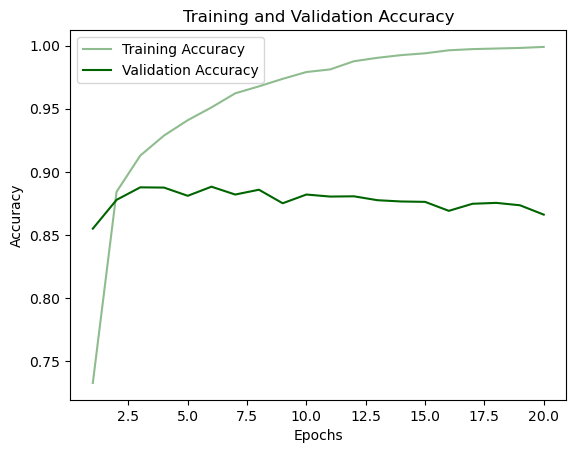

In [35]:
plt.clf()       #그래프 초기화

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, label='Training Accuracy', color='darkseagreen')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='darkgreen')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

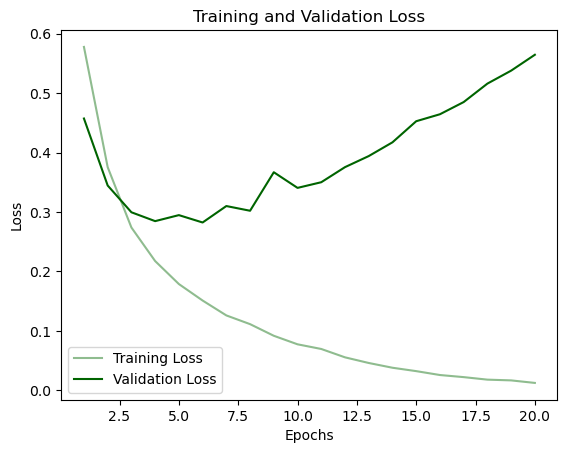

In [36]:
plt.clf()       #그래프 초기화

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, label='Training Loss', color='darkseagreen')
plt.plot(epochs, val_loss, label='Validation Loss', color='darkgreen')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 과적합 여부 확인을 바탕으로 모델재구성 (epoch 수정)

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, input_dim=10000,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=532, validation_data=(x_val,y_val))

Epoch 1/5
29/29 [==============================] - 2s 56ms/step - loss: 0.5854 - accuracy: 0.7599 - val_loss: 0.4920 - val_accuracy: 0.8286
Epoch 2/5
29/29 [==============================] - 1s 18ms/step - loss: 0.3928 - accuracy: 0.8810 - val_loss: 0.3775 - val_accuracy: 0.8596
Epoch 3/5
29/29 [==============================] - 1s 18ms/step - loss: 0.2938 - accuracy: 0.9065 - val_loss: 0.3196 - val_accuracy: 0.8786
Epoch 4/5
29/29 [==============================] - 1s 18ms/step - loss: 0.2352 - accuracy: 0.9239 - val_loss: 0.2829 - val_accuracy: 0.8903
Epoch 5/5
29/29 [==============================] - 1s 18ms/step - loss: 0.1983 - accuracy: 0.9345 - val_loss: 0.2892 - val_accuracy: 0.8833


In [38]:
# y가 1일 확률 == 리뷰댓글이 긍정적일 확률
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.22601275],
       [0.99295086],
       [0.79747266],
       ...,
       [0.06288279],
       [0.10077157],
       [0.38895196]], dtype=float32)

In [39]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)